In [1]:
# compare 3 backbone built models
from tensorflow.keras.models import load_model

model1 = load_model("models/model1.keras")
model2 = load_model("models/model2.keras")
model3 = load_model("models/model3.keras")

2025-07-08 23:02:14.368039: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from module.dataloader import create_generators

data_dir = "data/baseline"

_, val_gen = create_generators(
    data_dir,
    img_size=(224, 224),   
    batch_size=16,
    val_split=0.2,
    augment=False
)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [3]:
y_true = val_gen.classes

In [4]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='keras.src.trainers.data_adapters.py_dataset_adapter')

# Get predictions
y_pred1 = model1.predict(val_gen, verbose=1)
y_pred2 = model2.predict(val_gen, verbose=1)
y_pred3 = model3.predict(val_gen, verbose=1)

250/250 ━━━━━━━━━━━━━━━━━━━━ 182s 722ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 221s 873ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 160s 630ms/step


In [5]:
# If shape is (n_samples, 2), use [:, 1]; if (n_samples, 1), use [:, 0]
# eg Dense(1, activation='sigmoid'), adjust if needed
y_pred1_probs = y_pred1[:, 0]
y_pred2_probs = y_pred2[:, 0]
y_pred3_probs = y_pred3[:, 0]

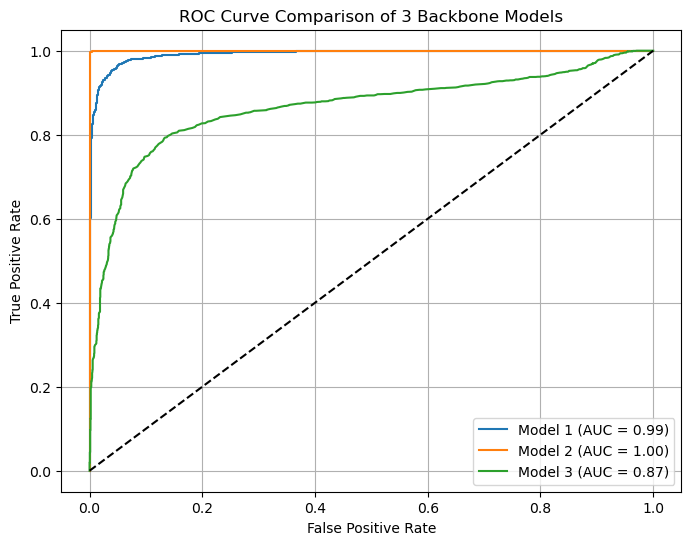

In [6]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC and AUC for each model
fpr1, tpr1, _ = roc_curve(y_true, y_pred1_probs)
fpr2, tpr2, _ = roc_curve(y_true, y_pred2_probs)
fpr3, tpr3, _ = roc_curve(y_true, y_pred3_probs)

auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)
auc3 = auc(fpr3, tpr3)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label=f'Model 1 (AUC = {auc1:.2f})')
plt.plot(fpr2, tpr2, label=f'Model 2 (AUC = {auc2:.2f})')
plt.plot(fpr3, tpr3, label=f'Model 3 (AUC = {auc3:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison of 3 Backbone Models")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# end of vision homework assignment